In [136]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import plotly.express as px

In [137]:
page = requests.get('https://www.mohfw.gov.in/')
soup = BeautifulSoup(page.text,'html.parser')

In [138]:
corona_table = soup('table',{'class':"table table-striped"})

In [139]:
headings = [th.get_text() for th in soup.find("tr").find_all("th")]
headings

['S. No.',
 'Name of State / UT',
 'Active Cases*',
 'Cured/Discharged/Migrated*',
 'Deaths**',
 'Total Confirmed cases*']

In [140]:
datasets = []
for row in soup.find_all("tr")[1:36]:
    dataset = [td.get_text() for td in row.find_all("td")]
    datasets.append(dataset)
datasets

[['1', 'Andaman and Nicobar Islands', '68', '83', '0', '151'],
 ['2', 'Andhra Pradesh', '11383', '12154', '277', '23814'],
 ['3', 'Arunachal Pradesh', '180', '120', '2', '302'],
 ['4', 'Assam', '5281', '8729', '22', '14032'],
 ['5', 'Bihar', '4013', '9816', '115', '13944'],
 ['6', 'Chandigarh', '113', '403', '7', '523'],
 ['7', 'Chhattisgarh', '757', '2903', '15', '3675'],
 ['8', 'Dadra and Nagar Haveli and Daman and Diu', '222', '189', '0', '411'],
 ['9', 'Delhi', '21567', '82226', '3258', '107051'],
 ['10', 'Goa', '869', '1273', '9', '2151'],
 ['11', 'Gujarat', '9468', '27718', '2008', '39194'],
 ['12', 'Haryana', '4572', '14510', '287', '19369'],
 ['13', 'Himachal Pradesh', '283', '846', '11', '1140'],
 ['14', 'Jammu and Kashmir', '3652', '5695', '154', '9501'],
 ['15', 'Jharkhand', '1015', '2208', '23', '3246'],
 ['16', 'Karnataka', '17786', '12833', '486', '31105'],
 ['17', 'Kerala', '2799', '3708', '27', '6534'],
 ['18', 'Ladakh', '139', '915', '1', '1055'],
 ['19', 'Madhya Prade

In [141]:
corona_df = pd.DataFrame(datasets,columns=headings)
corona_df.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,68,83,0,151
1,2,Andhra Pradesh,11383,12154,277,23814
2,3,Arunachal Pradesh,180,120,2,302
3,4,Assam,5281,8729,22,14032
4,5,Bihar,4013,9816,115,13944


In [142]:
corona_df.to_excel('Corona_data.xls')

In [143]:
corona_df['Active Cases*'] = pd.to_numeric(corona_df['Active Cases*'])
corona_df['Cured/Discharged/Migrated*'] = pd.to_numeric(corona_df['Cured/Discharged/Migrated*'])
corona_df['Deaths**'] = pd.to_numeric(corona_df['Deaths**'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae96028d0>,
      dtype=object)

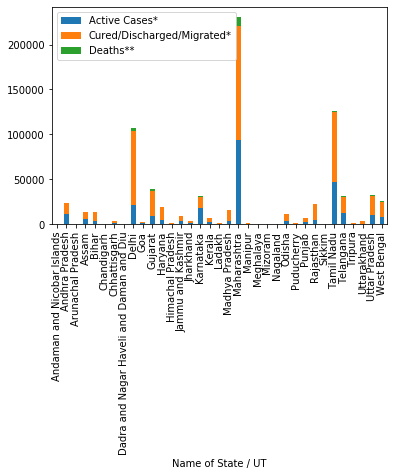

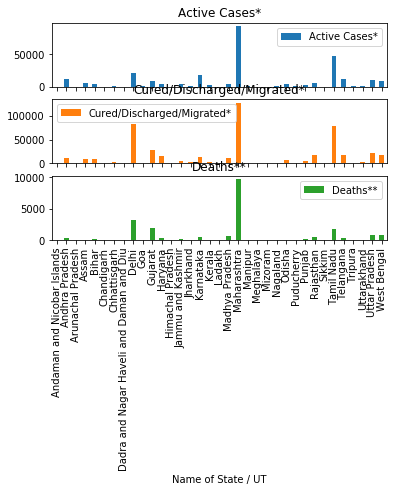

In [144]:
corona_df.plot.bar(x = 'Name of State / UT',stacked = True)
corona_df.plot.bar(x = 'Name of State / UT',stacked = True,subplots = True)